In [2]:
#importing libraries and reading the dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

data = pd.read_csv(r'C:\Users\merly\Downloads\loan_data.csv')
print(data.head())



C:\Users\merly\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [2]:


#basic EDA
print(data.shape)
print(data.columns)
print(data.dtypes)



(781, 10)
Index(['Gender', 'Job', 'WorkExp', 'CreditScore', 'EMIRatio', 'Status',
       'CreditHistory', 'Ownhouse', 'Purpose', 'Dependents'],
      dtype='object')
Gender            object
Job               object
WorkExp            int64
CreditScore        int64
EMIRatio         float64
Status            object
CreditHistory     object
Ownhouse           int64
Purpose           object
Dependents         int64
dtype: object


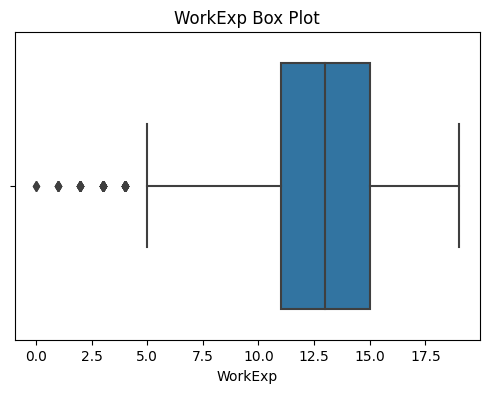

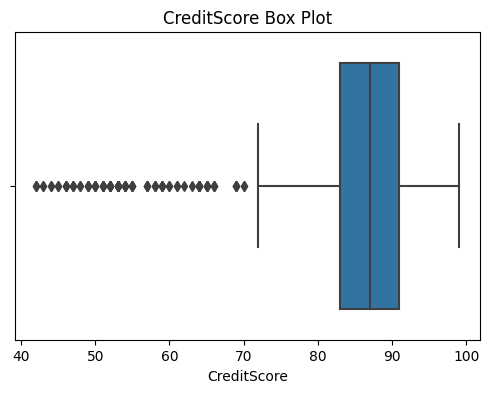

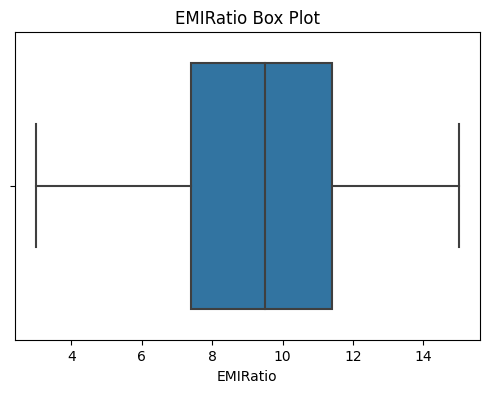

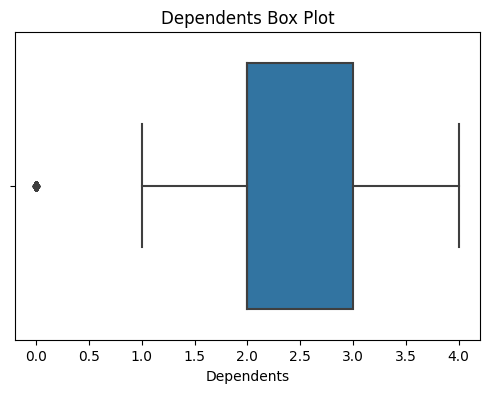

In [3]:
#outlier handeling 
numerical_features = ['WorkExp', 'CreditScore', 'EMIRatio', 'Dependents']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} Box Plot')
    plt.show()

In [31]:
categorical_features = ['Gender', 'LoanOffered', 'Job', 'Status', 'CreditHistory', 'Ownhouse', 'Purpose']

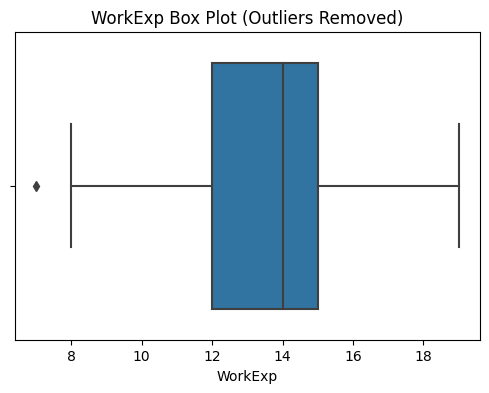

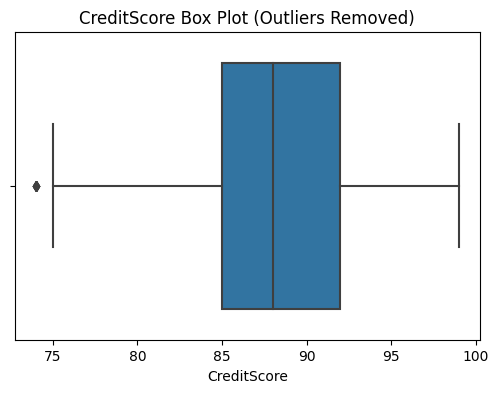

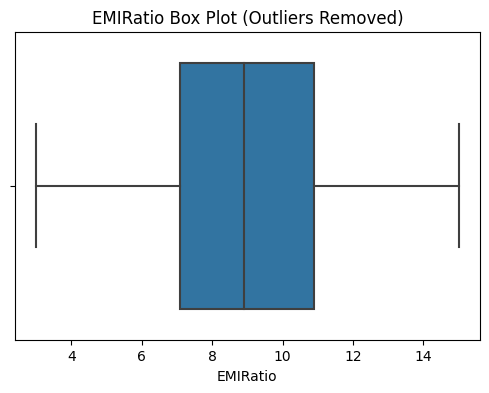

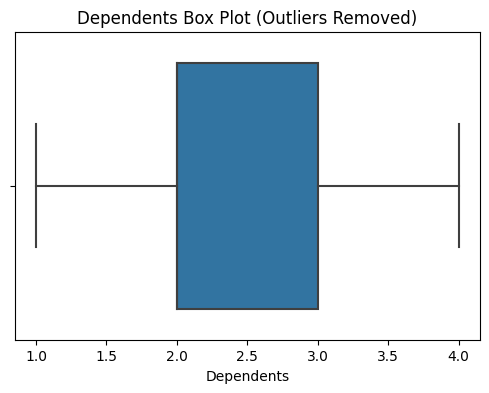

In [4]:
#outlier treatment
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    
    return data_filtered

# Apply the remove_outliers_iqr function on each numerical feature
for feature in numerical_features:
    data = remove_outliers_iqr(data, feature)

# Reset the index
data.reset_index(drop=True, inplace=True)

#box plot without outliers
numerical_features = ['WorkExp', 'CreditScore', 'EMIRatio', 'Dependents']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} Box Plot (Outliers Removed)')
    plt.show()

In [5]:
#categorical variable encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Job'] = label_encoder.fit_transform(data['Job'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['CreditHistory'] = label_encoder.fit_transform(data['CreditHistory'])
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])
print(data.head())

   Gender  Job  WorkExp  CreditScore  EMIRatio  Status  CreditHistory  \
0       1    2       14           86       3.0       1              2   
1       0    1       15           94       3.0       1              2   
2       1    2       16           86       3.0       1              2   
3       0    1       13           94       3.0       1              2   
4       1    1       12           85       3.3       1              2   

   Ownhouse  Purpose  Dependents  
0         1        3           2  
1         1        3           3  
2         1        3           2  
3         1        3           3  
4         1        3           2  


In [6]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data.head())

   Gender  Job  WorkExp  CreditScore  EMIRatio  Status  CreditHistory  \
0       1    2       14           86       3.0       1              2   
1       0    1       15           94       3.0       1              2   
2       1    2       16           86       3.0       1              2   
3       0    1       13           94       3.0       1              2   
4       1    1       12           85       3.3       1              2   

   Ownhouse  Purpose  Dependents  
0         1        3           2  
1         1        3           3  
2         1        3           2  
3         1        3           3  
4         1        3           2  


c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

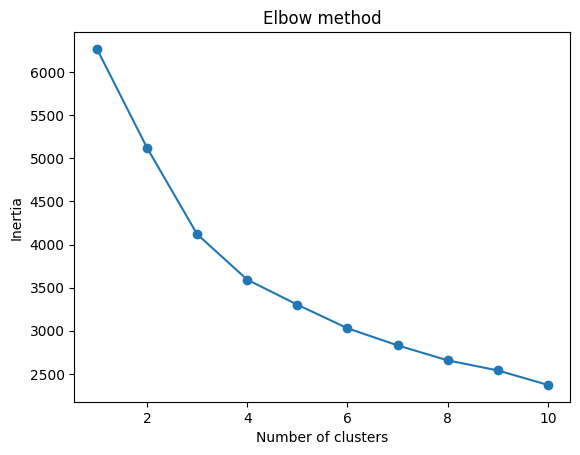

In [8]:
#elbow method to find optimal numbers of clusters 
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [9]:
# no of clusters is between 3 and 5 so we go with 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


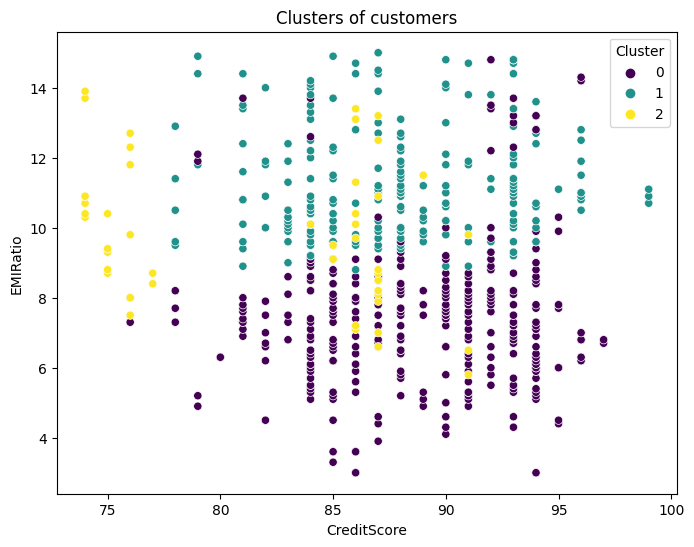

In [10]:


# Scatter plot of two relevant features, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['CreditScore'], y=data['EMIRatio'], hue=data['Cluster'], palette='viridis', legend='full')
plt.xlabel('CreditScore')
plt.ylabel('EMIRatio')
plt.title('Clusters of customers')
plt.show()



c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Cluster', ylabel='CreditScore'>

c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\abishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


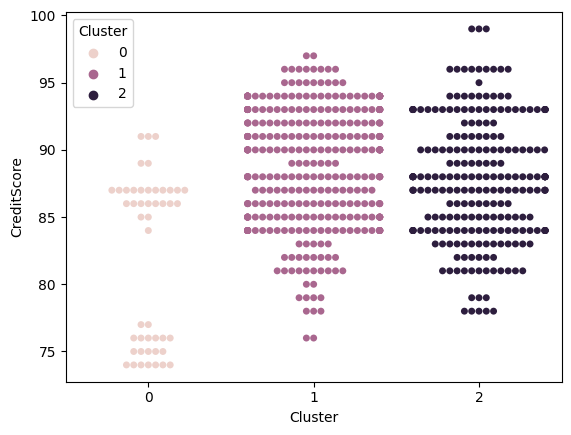

In [41]:
sns.swarmplot(x='Cluster', y='CreditScore',hue="Cluster", data=data)